In [7]:
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob

df = pd.read_csv('netflix_titles.csv', encoding='latin1')




In [9]:
df.shape

(8809, 26)

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [17]:

x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)


      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          A       1
4          G      41
5      NC-17       3
6         NR      80
7         PG     287
8      PG-13     490
9          R     799
10     TV-14    2160
11      TV-G     220
12     TV-MA    3208
13     TV-PG     863
14      TV-Y     307
15     TV-Y7     334
16  TV-Y7-FV       6
17        UR       3


In [18]:
pieChart =px.pie(x, values='counts', names='rating', title='Distribution of Ratings')
pieChart.show()

In [20]:
df['director']=df['director'].fillna('No Director specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,No Director specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,No Director specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,No Director specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [24]:
directors_list =df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0          Kirsten Johnson
1     0    No Director specified
2     0          Julien Leclercq
3     0    No Director specified
4     0    No Director specified
                   ...          
8804  0          Ruben Fleischer
8805  0             Peter Hewitt
8806  0              Mozez Singh
8807  0             Yeon Sang-ho
8808  0             Susanne Bier
Length: 9614, dtype: object


In [25]:
directors_list =directors_list.to_frame()
print(directors_list)

                            0
0    0        Kirsten Johnson
1    0  No Director specified
2    0        Julien Leclercq
3    0  No Director specified
4    0  No Director specified
...                       ...
8804 0        Ruben Fleischer
8805 0           Peter Hewitt
8806 0            Mozez Singh
8807 0           Yeon Sang-ho
8808 0           Susanne Bier

[9614 rows x 1 columns]


In [26]:
directors_list.columns=['director']
print([directors_list])

[                     director
0    0        Kirsten Johnson
1    0  No Director specified
2    0        Julien Leclercq
3    0  No Director specified
4    0  No Director specified
...                       ...
8804 0        Ruben Fleischer
8805 0           Peter Hewitt
8806 0            Mozez Singh
8807 0           Yeon Sang-ho
8808 0           Susanne Bier

[9614 rows x 1 columns]]


In [27]:
directors =directors_list.groupby(['director']).size().reset_index(name='counts')
print(directors)

                       director  counts
0                Aaron Moorhead       2
1                   Aaron Woolf       1
2      Abbas Alibhai Burmawalla       1
3              Abdullah Al Noor       1
4           Abhinav Shiv Tiwari       1
...                         ...     ...
5117               Ãagan Irmak       1
5118         Ãsold UggadÃ³ttir       1
5119      Ãskar ThÃ³r Axelsson       1
5120          Ãmer Faruk Sorak       2
5121             Åenol SÃ¶nmez       2

[5122 rows x 2 columns]


In [28]:
directors =directors[directors.director !='No Director specified']
print(directors)

                       director  counts
0                Aaron Moorhead       2
1                   Aaron Woolf       1
2      Abbas Alibhai Burmawalla       1
3              Abdullah Al Noor       1
4           Abhinav Shiv Tiwari       1
...                         ...     ...
5117               Ãagan Irmak       1
5118         Ãsold UggadÃ³ttir       1
5119      Ãskar ThÃ³r Axelsson       1
5120          Ãmer Faruk Sorak       2
5121             Åenol SÃ¶nmez       2

[5121 rows x 2 columns]


In [34]:
print(directors.columns)



Index(['director', 'counts'], dtype='object')


In [36]:
print(directors.head())



                    director  counts
0             Aaron Moorhead       2
1                Aaron Woolf       1
2   Abbas Alibhai Burmawalla       1
3           Abdullah Al Noor       1
4        Abhinav Shiv Tiwari       1


In [40]:
type(directors)
print(directors)


                       director  counts
0                Aaron Moorhead       2
1                   Aaron Woolf       1
2      Abbas Alibhai Burmawalla       1
3              Abdullah Al Noor       1
4           Abhinav Shiv Tiwari       1
...                         ...     ...
5117               Ãagan Irmak       1
5118         Ãsold UggadÃ³ttir       1
5119      Ãskar ThÃ³r Axelsson       1
5120          Ãmer Faruk Sorak       2
5121             Åenol SÃ¶nmez       2

[5121 rows x 2 columns]


In [42]:
directors = directors.sort_values(by=['counts'], ascending=False)
print(directors)


                 director  counts
4021        Rajiv Chilaka      22
4068         RaÃºl Campos      18
261             Jan Suter      18
4652          Suhas Kadav      16
3235         Marcus Raboy      16
...                   ...     ...
2341      J. Lee Thompson       1
2342      J. Michael Long       1
610    Songyos Sugmakanan       1
609        Smriti Keshari       1
2560      JoaquÃ­n MazÃ³n       1

[5121 rows x 2 columns]


In [43]:
top5directors =directors.head()
print(top5directors)

           director  counts
4021  Rajiv Chilaka      22
4068   RaÃºl Campos      18
261       Jan Suter      18
4652    Suhas Kadav      16
3235   Marcus Raboy      16


In [45]:
top5directors =top5directors.sort_values(by=['counts'])
barChart =px.bar(top5directors, x='counts', y='director', title='Top 5 Directors on Netflix')
barChart.show()

In [47]:
df['cast']=df['cast'].fillna('No Cast Specified')
cast_df =df['cast'].str.split(',', expand=True).stack()
cast_df =cast_df.to_frame()
cast_df.columns=['actor']
actors =cast_df.groupby(['actor']).size().reset_index(name='counts')
actors =actors.sort_values(by=['counts'], ascending=False)
actors =actors[actors.actor !='No Cast Specified']
top5actors =actors.head()
top5actors =top5actors.sort_values(by=['counts'])
barChart2 =px.bar(top5actors, x='counts', y='actor', title='Top 5 Actors on Netflix')
barChart2.show()

In [48]:
df1=df[['type','release_year']]
df1=df1.rename(columns={'release_year':'year'})
df2 =df1.groupby(['year', 'type']).size().reset_index(name='counts')

In [49]:
print(df2)

     year     type  counts
0    1925  TV Show       1
1    1942    Movie       2
2    1943    Movie       3
3    1944    Movie       3
4    1945    Movie       3
..    ...      ...     ...
115  2020    Movie     517
116  2020  TV Show     436
117  2021    Movie     277
118  2021  TV Show     315
119  2024  TV Show       1

[120 rows x 3 columns]


In [51]:
df2=df2[df2['year']>=2010]
graph =px.line(df2, x='year', y='counts', color='type', title='Trend of content produced over the years')
graph.show()

In [52]:
df2=df2[df2['year']>=2000]
graph =px.line(df2, x='year', y='counts', color='type', title='Trend of content produced over the years')
graph.show()

#sentiment Analaysis of Netflix

In [65]:
from textblob import TextBlob
import plotly.express as px
df3 = df[['release_year', 'description']].rename(columns={'release_year': 'year', 'description': 'Description'})
sentiments = []
for index, row in df3.iterrows():
    d = row['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p == 0:
        sent = 'Neutral'
    elif p > 0:
        sent = 'Positive'
    else:
        sent = 'Negative'
    sentiments.append(sent)

df3['sentiment'] = sentiments
df3 = df3.groupby(['year', 'sentiment']).size().reset_index(name='counts')
df3 = df3[df3['year'] >= 2015]
bargraph = px.bar(df3, x='year', y='counts', color='sentiment', title='Sentiment Analysis of Netflix')
bargraph.show()






In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [69]:
print(df1.columns)


Index(['type', 'year'], dtype='object')


In [70]:
df1.columns = df1.columns.str.strip()


In [71]:
df1.rename(columns={'Directors': 'directors', 'Casts': 'cast'}, inplace=True)


In [72]:
print([col.lower() for col in df1.columns])


['type', 'year']


In [73]:
if 'directors' not in df1.columns:
    df1['directors'] = "Unknown"
if 'cast' not in df1.columns:
    df1['cast'] = "Unknown"


In [74]:
df1['directors'].replace(np.nan, "Unknown", inplace=True)
df1['cast'].replace(np.nan, "Unknown", inplace=True)


<ipython-input-74-6e5a85ed3477>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-74-6e5a85ed3477>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [75]:
print(df1.isnull().sum())


type         0
year         0
directors    0
cast         0
dtype: int64


# visualization

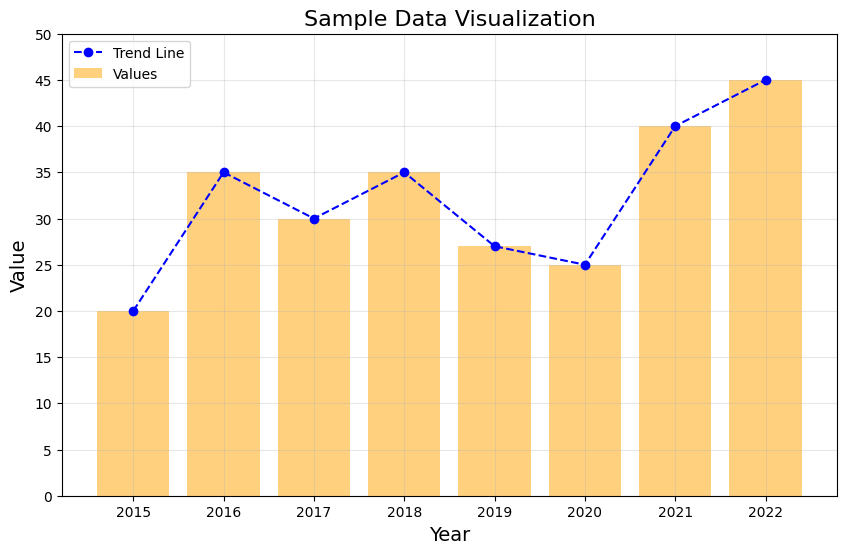

In [76]:
import matplotlib.pyplot as plt
import numpy as np

years = np.arange(2015, 2023)
values = [20, 35, 30, 35, 27, 25, 40, 45]


plt.figure(figsize=(10, 6))

plt.plot(years, values, label='Trend Line', color='blue', marker='o', linestyle='--')

plt.bar(years, values, alpha=0.5, label='Values', color='orange')

plt.title("Sample Data Visualization", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Value", fontsize=14)

plt.grid(alpha=0.3)

plt.legend()
plt.xticks(years)
plt.yticks(range(0, 51, 5))

plt.show()


# confusion Matrix

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



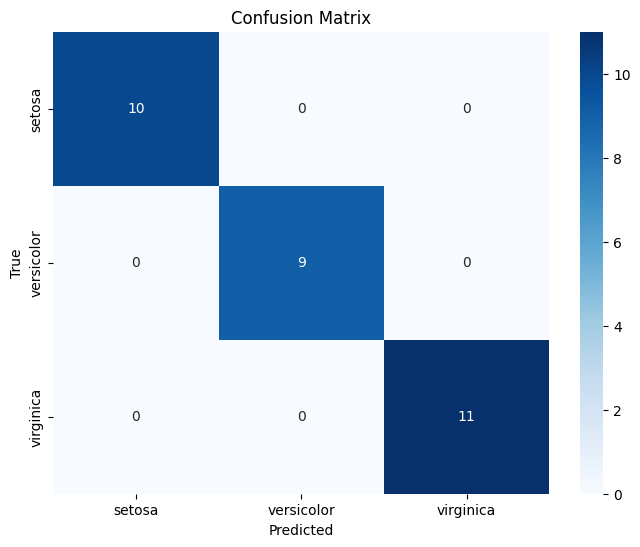

In [77]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris Dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the Data (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


#Scattering Plot

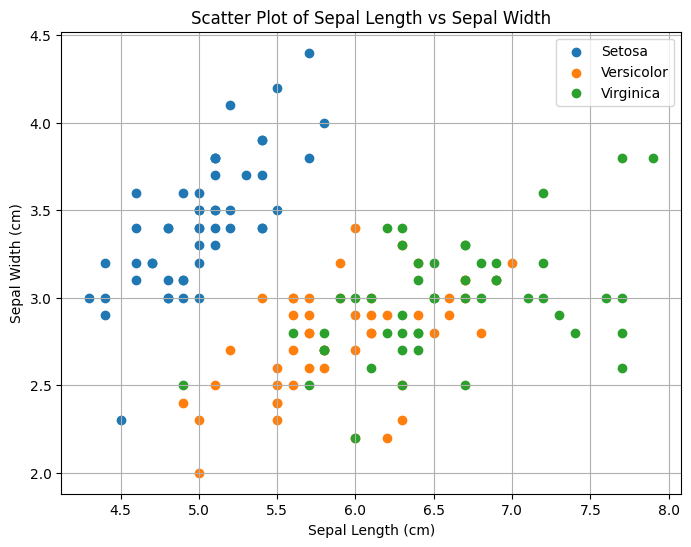

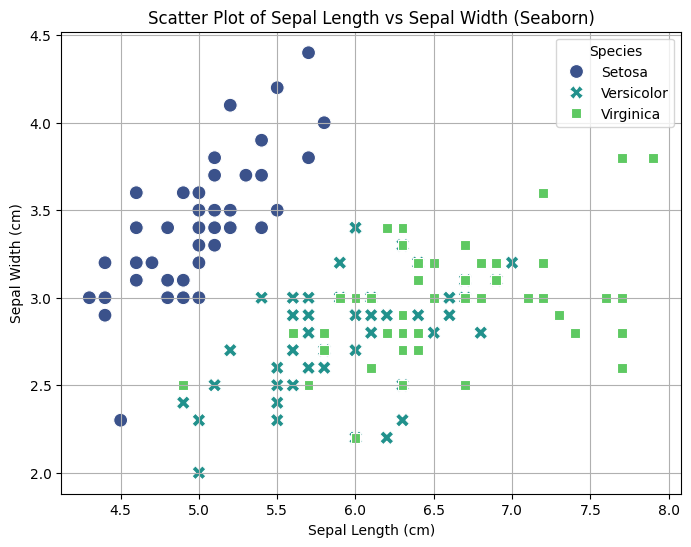

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris Dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Scatter Plot using Matplotlib
plt.figure(figsize=(8, 6))
for species, group in data.groupby('species'):
    plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'], label=species)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species', palette='viridis', s=100)
plt.title('Scatter Plot of Sepal Length vs Sepal Width (Seaborn)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()
